# Email Spam Detection

## Loading Libraries and Files

In [2]:
# Importing the necessary files to our environment

import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler       
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score              
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')                 


In [3]:
# Importing the files to our environment.
spam = pd.read_csv('spambase_csv.csv')

## Data Exploration

In [4]:
# Dispaying the first five records of the data.
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
# Let's print out the column names 
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


- This helps us tp familiarize ourselves with the columns that we have.

In [6]:
# Let's check the datatypes of the columns in our dataset
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

- The datatypes of the columns are all numerical in data.

In [7]:
# Getting a general description of the data we have using the describe() function.
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Dealing with Duplicate Records 

In [8]:
# First we check the number of rows and columns of our data.
print('Our dataset has ', spam.shape[0], 'rows and ', spam.shape[1], 'columns')

Our dataset has  4601 rows and  58 columns


In [9]:
# Checking for the presence and the number of duplicates in the data
print('Presence : ',spam.duplicated(keep = 'first').any())
print('Count    : ',spam.duplicated(keep = 'first').sum())

Presence :  True
Count    :  391


In [10]:
# Dealing with duplicate values while keeping the first occurence of the record.
spam.drop_duplicates(keep = 'first', inplace = True)

In [11]:
# We then check the shape of the dataframe to confirm that the duplicates have been dropped.
print('The dataset now has ', spam.shape[0], 'rows and ', spam.shape[1], 'columns')

The dataset now has  4210 rows and  58 columns


In [12]:
# Splitting the data into dependent and independent sets.
X = spam.drop('class', axis = 1)
y = spam['class']



In [13]:
X.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [15]:
# Normalizing the features 

norm = Normalizer().fit(X)


## Gaussian Model

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       479
           1       0.71      0.95      0.82       363

    accuracy                           0.82       842
   macro avg       0.83      0.83      0.82       842
weighted avg       0.85      0.82      0.82       842

[[341 138]
 [ 17 346]]
The accuracy : 0.815914489311164


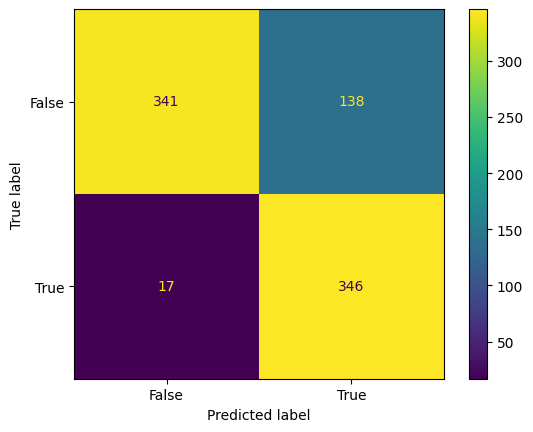

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)


# Training the model.
# Splitting the data into train and test sets

gauss = GaussianNB().fit(X_train, y_train)

# Predicting
y_pred = gauss.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

confusion_matrix1 = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])

cm_display.plot()
plt.show()

In [17]:
X_train.shape

(3368, 57)

## Multinomial NB Model

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       479
           1       0.76      0.75      0.75       363

    accuracy                           0.79       842
   macro avg       0.79      0.78      0.79       842
weighted avg       0.79      0.79      0.79       842

[[393  86]
 [ 91 272]]
The accuracy : 0.7897862232779097


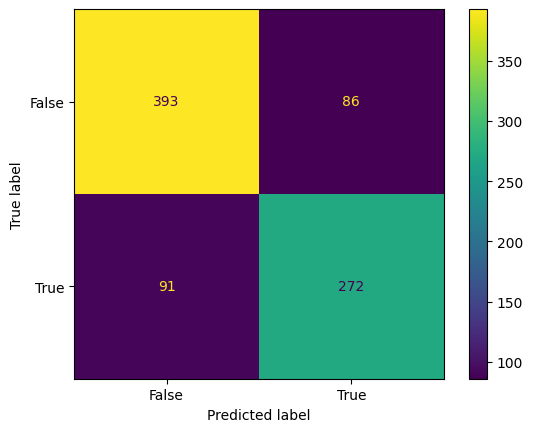

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

# Training the model.
# Splitting the data into train and test sets

multi = MultinomialNB().fit(X_train, y_train)

# Predicting
y_pred = multi.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

confusion_matrix2 = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm_display.plot()
plt.show()

## Bernoulli Model

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       479
           1       0.89      0.84      0.86       363

    accuracy                           0.88       842
   macro avg       0.89      0.88      0.88       842
weighted avg       0.88      0.88      0.88       842

[[441  38]
 [ 59 304]]
The accuracy : 0.8847980997624703


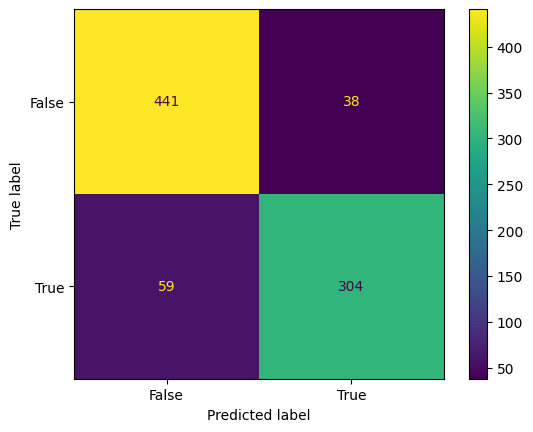

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

# Training the model.
# Splitting the data into train and test sets

bern = BernoulliNB().fit(X_train, y_train)

# Predicting
y_pred = bern.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

confusion_matrix3 = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])

cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       479
           1       0.80      0.73      0.76       363

    accuracy                           0.80       842
   macro avg       0.80      0.79      0.80       842
weighted avg       0.80      0.80      0.80       842

[[411  68]
 [ 99 264]]
The accuracy : 0.8016627078384798


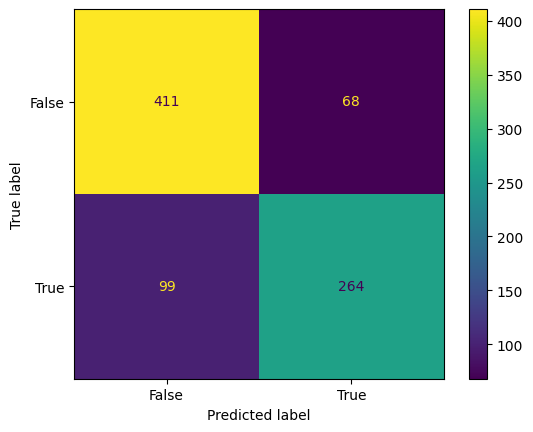

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)
from sklearn.neighbors import KNeighborsClassifier
# Training the model.
# Splitting the data into train and test sets
k = 5
model = KNeighborsClassifier(n_neighbors=k)
neigh = model.fit(X_train,y_train)

# Predicting
y_pred = neigh.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

confusion_matrix4 = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = [False, True])

cm_display.plot()
plt.show()

- The Bernoulli NB predicts both spam and legitimate emails with a precision of 89%

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       479
           1       0.81      0.62      0.70       363

    accuracy                           0.77       842
   macro avg       0.78      0.75      0.76       842
weighted avg       0.78      0.77      0.77       842

[[426  53]
 [138 225]]
The accuracy : 0.7731591448931117


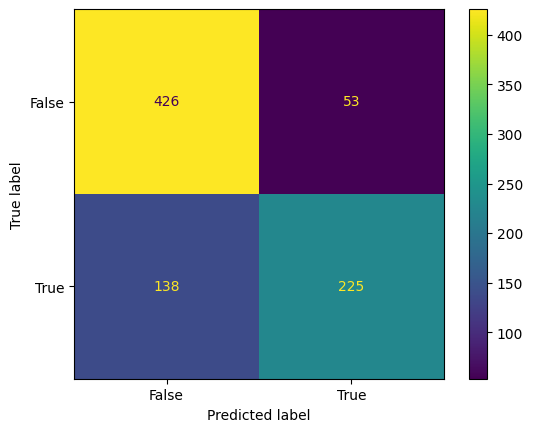

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)
from sklearn.neighbors import KNeighborsClassifier
# Training the model.
# Splitting the data into train and test sets
k = 10
model = KNeighborsClassifier(n_neighbors=k)
neigh = model.fit(X_train,y_train)

# Predicting
y_pred = neigh.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

confusion_matrix5 = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix5, display_labels = [False, True])

cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       479
           1       0.78      0.64      0.70       363

    accuracy                           0.76       842
   macro avg       0.77      0.75      0.75       842
weighted avg       0.77      0.76      0.76       842

[[413  66]
 [132 231]]
The accuracy : 0.7648456057007126


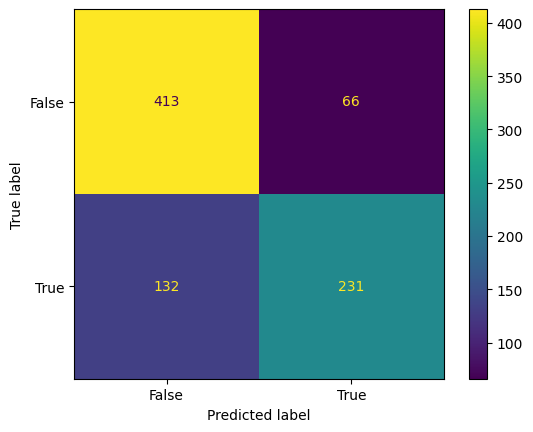

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)
from sklearn.neighbors import KNeighborsClassifier
# Training the model.
# Splitting the data into train and test sets
k = 20
model = KNeighborsClassifier(n_neighbors=k)
neigh = model.fit(X_train,y_train)

# Predicting
y_pred = neigh.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))

confusion_matrix6 = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix6, display_labels = [False, True])

cm_display.plot()
plt.show()

In [23]:
import re

def calculate_occurrence_percentage(text, symbol_list):
    word_counts = {}

    # Count occurrences of words and punctuation marks
    for symbol in symbol_list:
        count = text.lower().count(symbol.lower())
        word_counts[symbol] = count

    # Calculate the percentage of occurrences for each symbol
    total_words = len(re.findall(r'\w+', text))
    percentages = [(word_counts.get(symbol, 0) / total_words) * 100 for symbol in symbol_list]

    # Calculating uppercase letter statistics
    uppercase_letters = sum(1 for char in text if char.isupper() and char.isalpha())
    uppercase_sequences = re.findall(r'([A-Z]+)', text)
    avg_sequence_length = sum(len(seq) for seq in uppercase_sequences) / len(uppercase_sequences) if uppercase_sequences else 0
    longest_sequence_length = max(len(seq) for seq in uppercase_sequences) if uppercase_sequences else 0

    percentages.extend([avg_sequence_length, longest_sequence_length, uppercase_letters])

    return percentages

# Example usage:
input_text = "Your email address was selected to receive a prize money of $500,000.00 in the 2021 European lottery! To claim your prize for free please contact our staff at Logas, Nigeria. The prize has a transfer fee of $500 that must be paid upfront."

input_symbols = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people' , 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference',';','(','[','!','$','#']
result = calculate_occurrence_percentage(input_text, input_symbols)
print(result)

[0.0, 2.2222222222222223, 0.0, 0.0, 6.666666666666667, 0.0, 0.0, 0.0, 0.0, 2.2222222222222223, 2.2222222222222223, 0.0, 0.0, 0.0, 0.0, 2.2222222222222223, 0.0, 2.2222222222222223, 4.444444444444445, 0.0, 4.444444444444445, 0.0, 2.2222222222222223, 2.2222222222222223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2222222222222223, 4.444444444444445, 0.0, 1.0, 1, 6]


In [24]:
listheader = list(spam.columns)

    # Create a dictionary to hold the data
data = {}
    # Iterate over the elements of the first list
for i, value in enumerate(result):
    # Get the corresponding column name from the second list
    column_name = listheader[i]
    # Assign the value to the column in the dictionary
    data[column_name] = [value]
    
    # Create the DataFrame from the dictionary
dsample = pd.DataFrame(data)
    
dsample



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,2.222222,0.0,0.0,6.666667,0.0,0.0,0.0,0.0,2.222222,...,0.0,0.0,0.0,0.0,2.222222,4.444444,0.0,1.0,1,6


In [25]:

y_pred_sample = bern.predict(dsample)
print(y_pred_sample)

[1]
